# Fashion MINST Classification with Fandom Forest Classifier
The notebook build Fandom Forest Classifier to classify the images of Fashion MNIST into 10 classes

## *Question: How does the Fandom Forest Classifier perform on classifying the images of fashion ? Which category does this model make more mistakes?*


### **Result:**

classification accuracy on test set is: 0.8717857142857143

label 6 — Shirt is easier to be classified as label 0 — T-shirt/top and label 2 — Pullover

Random Forest model performs relatively not well on classifying shirt.



### load data and reshape the data

In [0]:
# import library
import tensorflow.keras as keras
import sys
sys.modules['keras'] = keras
from keras.models import Sequential
from keras.layers import Dense # define a layer
from keras.optimizers import SGD # this is a mini batch method
from keras.datasets import mnist
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
from sklearn.datasets import fetch_openml

In [0]:
# load the data
fasion_mnist=fetch_openml(name="Fashion-MNIST")

In [0]:
data=fasion_mnist.data
images=data.reshape(-1,28,28)
target=fasion_mnist.target.astype('int64')

In [0]:
#a row in data is an image (28x28 reshaped into a vector of 784 elements)
data.shape

(70000, 784)

In [0]:
# images[0] is the first image (28x28)
images.shape

(70000, 28, 28)

In [0]:
images[0].shape

(28, 28)

In [0]:
images[0].max()

255.0

### normalize the data

In [0]:
#normalize the value of every pixel into the range of 0 to 1
data = data.astype('float32')
data /= 255

In [0]:
#an element in target is the class label of the corresponding image in data
target.shape

(70000,)

In [0]:
[target.min(), target.max()]

[0, 9]

### show images of data

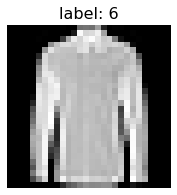

<Figure size 432x288 with 0 Axes>

In [0]:
# show some of the images
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, target.shape[0], 1000):
    x=data[n,:]
    x=x.reshape(28,28) # reshape a vector to an image
    ax.imshow(x, cmap='gray')    
    ax.axis('off')
    ax.set_title('label: ' + str(int(target[n])), fontsize=16)
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.1)  

### Split data and Train Random Forest Model


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=0)

### define the random forest classifier

In [0]:
#set class_weight='balanced'
RF=RandomForestClassifier(n_estimators=20, class_weight='balanced', max_depth=20, random_state=0)
RF.fit(X_train, Y_train)
Y_val_pred=RF.predict(X_val)
confusion_val=confusion_matrix(Y_val, Y_val_pred)
Y_test_pred=RF.predict(X_test)
confusion_test=confusion_matrix(Y_test, Y_test_pred)

### Hyper-parameter tuning: Find the best depth of random forest

In [0]:
max_depth_list = np.arange(18,40)

In [0]:
acc_train_list=[]
acc_val_list=[]
for i in max_depth_list:
    RF=RandomForestClassifier(n_estimators=20, class_weight='balanced', max_depth=i, random_state=0)
    RF.fit(X_train, Y_train)
    Y_val_pred=RF.predict(X_val)
    confusion_val=confusion_matrix(Y_val, Y_val_pred)
    Y_train_pred=RF.predict(X_train)
    confusion_train=confusion_matrix(Y_train, Y_train_pred)
    acc_train_list.append(RF.score(X_train, Y_train))
    acc_val_list.append(RF.score(X_test, Y_test))

print(acc_train_list)
print(acc_val_list)

[0.9857936507936508, 0.988531746031746, 0.9909126984126985, 0.9933134920634921, 0.9941071428571429, 0.9960515873015873, 0.9966865079365079, 0.9974603174603175, 0.9982738095238095, 0.9982936507936508, 0.9986309523809523, 0.9985714285714286, 0.9987301587301587, 0.9988888888888889, 0.998968253968254, 0.998968253968254, 0.9990674603174603, 0.9991071428571429, 0.9990476190476191, 0.9990476190476191, 0.9990476190476191, 0.9990873015873016]
[0.865, 0.8682142857142857, 0.8655714285714285, 0.8660714285714286, 0.8673571428571428, 0.8670714285714286, 0.8667857142857143, 0.8663571428571428, 0.8666428571428572, 0.8666428571428572, 0.8677857142857143, 0.8717857142857143, 0.8687142857142857, 0.8672142857142857, 0.8668571428571429, 0.8660714285714286, 0.8672857142857143, 0.8674285714285714, 0.87, 0.8672142857142857, 0.8689285714285714, 0.8697142857142857]


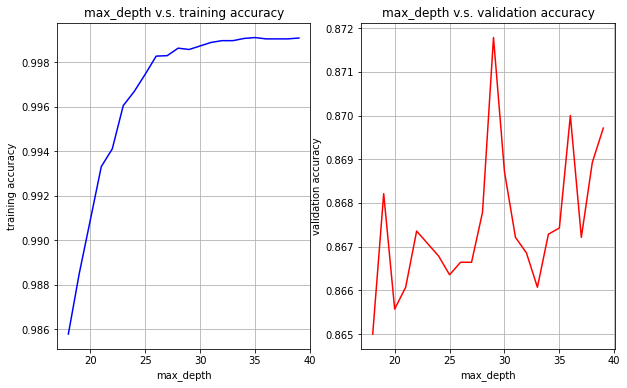

In [0]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].plot(max_depth_list, acc_train_list, 'b')
ax[0].set_xlabel('max_depth')
ax[0].set_ylabel('training accuracy')
ax[0].set_title('max_depth v.s. training accuracy')
ax[0].grid(True)
ax[1].plot(max_depth_list, acc_val_list, 'r')
ax[1].set_xlabel('max_depth')
ax[1].set_ylabel('validation accuracy')
ax[1].set_title('max_depth v.s. validation accuracy')
ax[1].grid(True)

In [0]:
max_depth_best=29

### train model with best maximum depth of random forest

In [0]:
RF=RandomForestClassifier(n_estimators=20, class_weight='balanced', max_depth= max_depth_best, random_state=0)
RF.fit(X_train, Y_train)
Y_train_pred=RF.predict(X_train)
confusion_train=confusion_matrix(Y_train, Y_train_pred)
Y_test_pred=RF.predict(X_test)
confusion_test=confusion_matrix(Y_test, Y_test_pred)

### Create confusion matrix

In [0]:
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test, Y_test_pred)
print(cm)

[[1184    0   20   54    3    1  123    0    6    0]
 [   4 1364    3   43    3    0    5    0    2    0]
 [   9    0 1121   13  150    1   69    0    3    0]
 [  34    9   15 1307   49    0   38    0    3    0]
 [   2    3  132   52 1121    0   74    0    3    1]
 [   0    0    0    0    0 1344    0   36    3   14]
 [ 253    3  178   27  120    2  875    0   15    0]
 [   0    0    0    0    0   39    0 1250    1   64]
 [   5    0    4    2    6    4   16    4 1298    2]
 [   0    0    0    1    0   12    0   53    4 1341]]


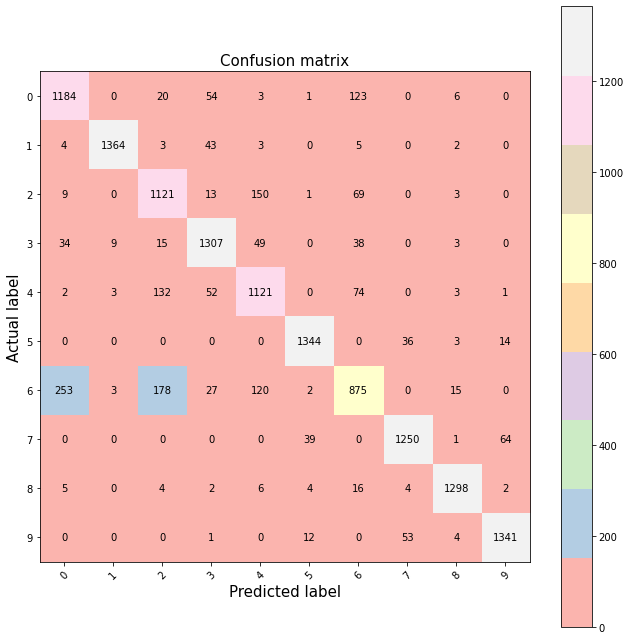

In [0]:
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):    
  for y in range(height):
    plt.annotate(str(cm[x][y]), xy=(y, x), 
    horizontalalignment='center',
    verticalalignment='center')

In [0]:
confusion_train

In [0]:
RF.score(X_train, Y_train)

0.9985714285714286

In [0]:
RF.score(X_test, Y_test)

0.8717857142857143

### Look at part of the predicted label

In [0]:
RF.predict(X_test[0:10])

In [0]:
Y_test[0:10]